# Figure 2 - Background variation

In [11]:
# load external dependencies
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
import matplotlib.patheffects as PathEffects
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

import json, matplotlib
s = json.load( open("matplotlibrc.json") )
matplotlib.rcParams.update(s)

import glob, os, re
import numpy as np
import pandas as pd # (*) Pandas for data manipulation

# load internal dependencies
import colors,plot,stats,utils
from paths import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data import

In [12]:
# sgd_length = pd.read_csv('~/reference/SGD_2010.lengths', names=['chr','chrs','length'], index_col=False, sep=' ')
# sgd_length['start'] = ((pd.rolling_sum((sgd_length['length']), 2) - sgd_length['length']).fillna(0) + 1).cumsum(axis=0)
# sgd_length['end'] = (sgd_length['length'] + 1).cumsum(axis=0)
# sgd_length = sgd_length.drop('length', axis=1)

In [15]:
pfiles = glob.glob(dir_data+"seq/filterHD-v1.0/seg_sites/pools/SNVs.seg.WAxNA_F12_1_RM_1.filtered.posterior-*.txt")

seq_freq_df = pd.DataFrame()
for pp in pfiles:
    # read into pandas dataframe
    frame = pd.read_csv(pp, sep=r"\s+", index_col=None)
    frame.rename(columns={'#sample': 'chr_arabic'}, inplace=True)
    #
    f = re.split(r'[.-]+', os.path.basename(pp))
    frame['sample'] = f[2]
    frame['background'] = f[2].split('_')[0]
    frame['cross'] = f[2].split('_')[1]
    frame['cross_rep'] = f[2].split('_')[2]
    frame['env'] = f[2].split('_')[3]
    frame['prop_rep'] = f[2].split('_')[4]
    frame['time'] = int(f[5])
    #
    seq_freq_df = seq_freq_df.append(frame, ignore_index=True)
    

seq_freq_df = utils.chr_to_gw(seq_freq_df)

seq_freq_df = pd.pivot_table(seq_freq_df, index=['sample','chr_arabic','site'], columns=['time'], values='mean')

seq_freq_df.head()

time                                 2      4      8      16     32
sample           chr_arabic site                                   
WAxNA_F12_1_RM_1 1          2718  0.951  0.929  0.951  0.942  0.966
                            2731  0.952  0.929  0.952  0.942  0.967
                            2734  0.952  0.929  0.952  0.942  0.967
                            4532  0.958  0.936  0.952  0.935  0.973
                            5035  0.959  0.936  0.941  0.936  0.979

Bottom panel

In [16]:
# load data
files = glob.glob(dir_data+'seq/QTL-figure-1.0-data/WAxNA*kb*.txt')

seq_qtl_df = pd.DataFrame()

for fn in files:
    # read into pandas dataframe
    df = pd.read_csv(fn, sep=r"\s+", names=['locus','score'], index_col=None)
    df.rename(columns={'#sample': 'chr'}, inplace=True)
    #
    f = re.split(r'[.-]+', os.path.basename(fn))
    df['environment'] = f[0].split('_')[3]
    df['sample'] = f[0]
    df['chr'] = f[2].replace('chr','')
    df['resolution'] = float(f[3].replace('kb',''))
    #
    seq_qtl_df = seq_qtl_df.append(df, ignore_index=True)

seq_qtl_df = pd.pivot_table(seq_qtl_df, index=['chr','locus'], columns=['environment','resolution','sample'], values='score')
# seq_qtl_df = pd.pivot_table(seq_qtl_df, index=['environment','resolution','sample'], columns=['chr','locus'], values='score')

seq_qtl_df.head()

environment               HU                                    \
resolution                2                                      
sample      WAxNA_F12_1_HU_1 WAxNA_F12_1_HU_2 WAxNA_F12_1_HU_3   
chr locus                                                        
12  15424           0.096706          70.4832         0.020368   
    15466           0.065370          69.1842         0.173942   
    15467           0.065365          69.1842         0.173890   
    15487           0.065398          69.1842         0.173893   
    15654           0.038136          66.4977         0.296083   

environment                                                     \
resolution                                                       
sample      WAxNA_F12_2_HU_1 WAxNA_F12_2_HU_2 WAxNA_F12_2_HU_3   
chr locus                                                        
12  15424            35.6058         0.021972          4.12386   
    15466            34.8159         0.060021          4.31458   
    15467            34.8159         0.060019          4.31458   
    15487            34.8159         0.060034          4.31457   
    15654            34.7954         0.101564          4.39088   

environment                                                     \
resolution                5                                      
sample      WAxNA_F12_1_HU_1 WAxNA_F12_1_HU_2 WAxNA_F12_1_HU_3   
chr locus                                                        
12  15424            2.94375          149.456         0.510845   
    15466            3.58708          157.778         0.748491   
    15467            3.58706          157.779         0.748465   
    15487            3.58705          157.779         0.748496   
    15654            3.48029          157.727         0.774527   

environment                        ...                     RM  \
resolution                         ...                     50   
sample      WAxNA_F12_2_HU_1       ...       WAxNA_F12_1_RM_1   
chr locus                          ...                          
12  15424            33.8832       ...                18.6832   
    15466            33.6605       ...                18.6354   
    15467            33.6605       ...                18.6354   
    15487            33.6606       ...                18.6354   
    15654            33.8821       ...                18.2325   

environment                                                     \
resolution                                                       
sample      WAxNA_F12_1_RM_2 WAxNA_F12_1_RM_3 WAxNA_F12_1_RM_4   
chr locus                                                        
12  15424            26.7453          2.01600          1.55037   
    15466            26.7027          2.01596          1.55033   
    15467            26.7027          2.01594          1.55044   
    15487            26.7027          2.01600          1.55033   
    15654            26.6765          2.07154          1.60980   

environment                                                     \
resolution                                                       
sample      WAxNA_F12_2_RM_1 WAxNA_F12_2_RM_2 WAxNA_F12_2_RM_3   
chr locus                                                        
12  15424            8.90354          3.54773         0.011633   
    15466            8.90353          3.54775         0.011775   
    15467            8.90351          3.54777         0.011728   
    15487            8.90353          3.54773         0.011736   
    15654            9.25115          3.64734         0.005185   

environment                                                   
resolution                                                    
sample      WAxNA_F12_2_RM_4 WAxNA_F2_1_RM_1 WAxNA_F2_2_RM_1  
chr locus                                                     
12  15424            4.32386         6.62446         4.72040  
    15466            4.32725         6.62446         4.72045  
    15467            4.32722         6.62448         4.72054 

In [17]:
# load data
files = glob.glob(dir_data+'seq/QTL-figure-1.0-data/bestScores.*')

seq_scores_df = pd.DataFrame()

for fn in files:
    # read into pandas dataframe
    df = pd.read_csv(fn, sep=r"\s+", names=['locus','score'], index_col=None)
    df.rename(columns={'#sample': 'chr'}, inplace=True)
    #
    f = re.split(r'[.-]+', os.path.basename(fn))
    df['environment'] = f[1]
    df['chr'] = f[2].replace('chr','')
    df['resolution'] = float(f[3].replace('kb',''))
    #
    seq_scores_df = seq_scores_df.append(df, ignore_index=True)

# seq_scores_df = pd.pivot_table(seq_scores_df, index=['env','chr','locus'], columns=['resolution'], values='score')


# # load data
# files = glob.glob(dir_data+'data.main.text.figures/QTL-figure-1.0-data/bestScores.HU.chr12.kb30.0.txt')

# seq_qtl_best_df = pd.read_csv(files[0], sep='\t')
seq_scores_df.head()

,locus,score,environment,chr,resolution
0,650632,589.61400,HU,12,10
1,640928,3.24466,HU,12,10
2,640928,302.15000,HU,12,10
3,640928,245.66600,HU,12,10
4,650274,110.43300,HU,12,10


In [18]:
# load data
pheno_df = utils.load_data(dir_data+'pheno/pheno_populations_norm.pickle')

pheno_df = pheno_df.replace('WAxNA','WA/NA')

# filter out strains used for spatial control
pheno_df = pheno_df[(pheno_df.env_test.isin([u'RM'])) &\
                    ((pheno_df.population == u'WA/NA') & (pheno_df.genotype_long == u'WT'))|\
                    ((pheno_df.population == u'WA/NA') &(pheno_df.gene.isin([u'CTF8',u'KOG1'])))]

pheno_df['genotype_long'] = pheno_df['genotype_long'].replace('CTF8','',regex=True)
pheno_df['genotype_long'] = pheno_df['genotype_long'].replace('ctf8','',regex=True)
pheno_df['genotype_long'] = pheno_df['genotype_long'].replace('KOG1','',regex=True)
pheno_df['genotype_long'] = pheno_df['genotype_long'].replace('kog1','',regex=True)
pheno_df['genotype_long'] = pheno_df['genotype_long'].replace(' ','',regex=True)

pheno_df.head()

,env_evo,env_test,run,Index,Plate,Row,Column,ID,ID_plate,background,...,assignment,isolate,gene,genotype_short,genotype_long,aminoacid,mating,auxotrophy,doubling_time,growth_rate
450,RM,RM,1,450,0,9,18,P10_C5,10,parents,...,,,,,WT,,MATa/α,,0.454481,0.729773
454,RM,RM,1,454,0,9,22,P10_C6,10,parents,...,,,,,WT,,MATa/α,,0.361519,0.778345
546,RM,RM,1,546,0,11,18,P10_C5,10,parents,...,,,,,WT,,MATa/α,,0.389962,0.763150
550,RM,RM,1,550,0,11,22,P10_C6,10,parents,...,,,,,WT,,MATa/α,,0.440472,0.736894
1010,RM,RM,1,1010,0,21,2,P10_F1,10,constructs,...,,,KOG1,,ΔWA/NA,,MATa/α,,NaN,NaN


Figure

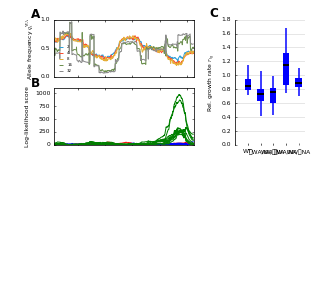

In [21]:
# fig, (ax1, ax1_zoom, ax2, ax2_zoom) = plt.subplots(4, 1, figsize=(3, 4), sharex=False, dpi=300)
dict_environment = {'HU':'r','RM':'g','MO':'b'}

fig = plt.figure(figsize=(4, 4), dpi=300)

import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2, 2, width_ratios=[2,1], height_ratios=[1,1,2], hspace=0.1, wspace=0.4)

gs = {}
gs['freq'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,0])
gs['llh'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[1,0])
gs['zoom'] = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=grid[:,1], hspace=0)
gs['pheno'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[:,1])

### top panel ###
ax1 = plt.subplot(gs['freq'][:])
ax1_zoom = plt.subplot(gs['zoom'][0])

for ax in [ax1,ax1_zoom]:
    seq_freq_df.loc[('WAxNA_F12_1_RM_1',8),:].plot(ax=ax, lw=1, legend=False)

ax1.set_ylabel('Allele frequency $q_i^\\mathrm{WA}$', fontsize=6)

# ax1.set_xlim(0, 6E5)
ax1_zoom.set_xlim(4.2E5, 5E5)
# ax1_zoom.set_ylim(0, 1)
# zoom_effect(ax1, ax2, 4.2E5, 5E5, color='gray')

# trans = ax1.get_xaxis_transform() # x in data units, y in axes fraction

ax1.annotate('WAxNA F12 1 RM 1', xy=(0.5, 1.05),
             xytext=(0, 3), textcoords='offset points',
             fontsize=5, style='italic', va='bottom', ha='center')

for ax in [ax1, ax1_zoom]:
    ax.set_ylim(0,1)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=2))

ax1.text(-0.1, 1.2, 'A', transform=ax1.transAxes,
         fontsize=12, fontweight='bold', va='top', ha='right')

### middle panel ###
ax2 = plt.subplot(gs['llh'][:], sharex=ax1)
ax2_zoom = plt.subplot(gs['zoom'][1], sharex=ax1_zoom)

for ax in [ax2,ax2_zoom]:
    llh = seq_qtl_df.loc['8',(['HU','RM','MO'],30)]
    llh.columns = llh.columns.droplevel(level=['sample','resolution'])
    llh.plot(ax=ax, color=[dict_environment[c] for c in llh.columns], lw=1, legend=False)

for k, s in seq_scores_df[(seq_scores_df.resolution==30)].groupby('resolution'):
    markerline, stemlines, baseline = ax2_zoom.stem(s.locus, s.score)
    
    plt.setp(markerline, 'markerfacecolor', 'b', markersize = 3)
    plt.setp(stemlines, linewidth=1, color='b',
             path_effects=[PathEffects.withStroke(linewidth=0.75, foreground="w")])
        
ax2.set_xlabel('Coordinate (kb)')
ax2.set_ylabel('Log-likelihood score')

# ax2.set_xlim(0, 6E5)
ax2_zoom.set_xlim(4.2E5, 5E5)
# zoom_effect(ax2, ax1_zoom, 4.2E5, 5E5, edgecolor='black', facecolor='gray')#, edgewidth=5)

trans = ax2_zoom.get_xaxis_transform() # x in data units, y in axes fraction

for gene, loc in zip(['CTF8','KOG1'],[486230+(486631-486230)/2.,475999+(480672-475999)/2.]):
    ax2_zoom.annotate(gene, xy=(loc, 1.05),
                      xytext=(0, 3), textcoords='offset points',
                      arrowprops=dict(arrowstyle='wedge,tail_width=0.7', color='black'),
                      xycoords=trans, fontsize=5, style='italic', va='bottom', ha='center')

for ax in [ax2, ax2_zoom]:
    ax.set_ylim(0, 1.1E3)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

ax2.text(-0.1, 1.2, 'B', transform=ax2.transAxes,
         fontsize=12, fontweight='bold', va='top', ha='right')

### bottom panel ###
ax3 = plt.subplot(gs['pheno'][:])

param = 'growth_rate'

p = pheno_df.set_index(['population','gene','genotype_long'], append=True)[param]\
.unstack(['population','gene','genotype_long'])

ax3, bp = p.plot(ax=ax3, kind='box', return_type='both',
                 labels=p.columns.get_level_values('population'))

plot.boxplot_custom(bp, ax3, ['b']*10, ['']*10)
#                colors=[color_background_mut[b] for b in gph3.columns.get_level_values('population')],
#                            hatches=['']*30)

# ## background
# xlabels = p.columns.get_level_values('genotype_long')
# for v, k in enumerate(xlabels):
#     ax3.annotate('\nx\n'.join(k) if isinstance(k, tuple) else k, 
#                  xy=(v+1, 0.97), xycoords=("data", "axes fraction"),
#                  ha='center', va='top', annotation_clip=False, fontsize=4)

# for line in bp['whiskers']:
#     x, y = line.get_xydata()[1] # bottom of left line
#     ax3.text(x,y, '%.1f' % x,
#          horizontalalignment='center', # centered
#          verticalalignment='top')      # below
#     x, y = line.get_xydata()[3] # bottom of right line
#     ax3.text(x,y, '%.1f' % x,
#          horizontalalignment='center', # centered
#              verticalalignment='top')      # below

xlabels = p.columns.get_level_values('genotype_long')
ax3.set_xticks([x for x in np.arange(len(xlabels))], minor=True)
ax3.set_xticklabels(['/'.join(x) if isinstance(x, tuple) else x for x in xlabels], fontsize=4)

# # gene
# xstart, xend, xlabels = set_custom_labels(p.columns, 1)
# ax3.set_xticks([x+1 for x in xlabels.values()], minor=False)
# ax3.set_xticklabels(xlabels.keys(), minor=True, fontsize=6)

ax3.set_ylabel(r'Rel. growth rate $r_{bg}$', fontsize=6)

ax3.set_ylim(0,1.8)

ax3.text(-0.25, 1.1, 'C', transform=ax3.transAxes,
         fontsize=12, fontweight='bold', va='top', ha='right')

# axes limits
for ax in [ax1,ax1_zoom,ax2,ax2_zoom]:
#     ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.tick_params(axis='both', which='major', size=1, labelsize=4)
# for ax in [ax1,ax2]:
#     utils.simple_axes(ax)
#     ax.set_xlim((3E5,5.25E5))

ax1.legend(frameon=False, prop={'size':4}, ncol=1,
           loc='lower left', handlelength=1.5)

# ax2.legend(bbox_to_anchor=(1.05, 0.5), frameon=False,
#            loc='center left', borderaxespad=0.,
#            handlelength=0.75, title='Time')

# ax3.legend()

# axes limits
for ax in fig.get_axes():
    ax.xaxis.label.set_size(6)
    ax.yaxis.label.set_size(6)
    ax.tick_params(axis='both', which='major', size=2, labelsize=6)
    ax.tick_params(axis='both', which='minor', size=1, labelsize=4)
    for sp in ax.spines.values():
        sp.set(color='k', linewidth=0.75, linestyle='-')

fig.savefig(dir_paper+'figures/figure2/figure2.svg', dpi=300, bbox_inches='tight')
fig.savefig(dir_paper+'figures/figure2/figure2.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
x=seq_qtl_df.loc['8',(['HU','RM','MO'],30)]
x.columns = x.columns.droplevel(level=['sample','resolution'])
col = {'HU':'r','RM':'g','MO':'b'}
seq_freq_df.loc[('WAxNA_F12_1_RM_1',8),:]
# seq_qtl_df.loc['8',(['HU','RM','MO'],30)]
# x.plot(color=[col[c] for c in x.columns], lw=1, legend=False)
# x.sortlevel(level='environment',axis='index')#.plot(legend=False)
# x.reset_index(level=['resolution','sample'], drop=True)#.plot(legend=False)